***
# <font color=green size=10>**TRABALHO FINAL DO CURSO INDATA**</font>
***

**>> Nome completo do discente**

*Jussara Miliano Soares*

**>> Técnica utilizada**

*Árvore de Decisão - Classificação*

**>> Banco de dados utilizado**

Telecom Customer é um dataset com 100 colunas (variáveis) e aproximadamenete cem mil registros. Os atributos variam entre categorias como a relação de uso cliente com os serviços, equipamentos até informações sobre localização geográfica e estilo de vida.


*Link do banco de dados original: [Telecom Customer](https://www.kaggle.com/datasets/abhinav89/telecom-customer/data)*


## <font color=green size=6>**Desenvolvimento do projeto**</font>

**>> Problema a ser solucionado**

*Prever através do modelo de aŕvore de decisão pra classificação se o cliente irá cancelar o serviço com base em seu histórico com a empresa.*

### **01. Importação de bibliotecas necessárias para o projeto.**

In [ ]:
#bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from IPython.display import Image, display

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix




### **02. Importação do banco de dados para o projeto.**

In [ ]:
df = pd.read_csv('Telecom_customer churn.csv')

<details>
  <summary>Expanda a mensagem para ver o significado de cada variável</summary>

| S.No | Nome da Coluna             | Significado no Artigo                                                                 |
|------|----------------------------|--------------------------------------------------------------------------------------|
| 1    | rev_Mean                   | Média de receita mensal (valor cobrado)                                              |
| 2    | mou_Mean                   | Média de minutos de uso mensais                                                      |
| 3    | totmrc_Mean                | Média de cobrança mensal recorrente total                                            |
| 4    | da_Mean                    | Média de chamadas de assistência de diretório                                        |
| 5    | ovrmou_Mean                | Média de minutos de uso excedentes                                                   |
| 6    | ovrrev_Mean                | Média de receita excedente                                                           |
| 7    | vceovr_Mean                | Média de receita excedente de voz                                                    |
| 8    | datovr_Mean                | Média de receita excedente de dados                                                  |
| 9    | roam_Mean                  | Média de chamadas em roaming                                                         |
| 10   | change_mou                 | Percentual de mudança nos minutos de uso mensais em relação à média dos três meses anteriores |
| 11   | change_rev                 | Percentual de mudança na receita mensal em relação à média dos três meses anteriores  |
| 12   | drop_vce_Mean              | Média de chamadas de voz interrompidas (falhas)                                      |
| 13   | drop_dat_Mean              | Média de chamadas de dados interrompidas (falhas)                                    |
| 14   | blck_vce_Mean              | Média de chamadas de voz bloqueadas (falhas)                                         |
| 15   | blck_dat_Mean              | Média de chamadas de dados bloqueadas (falhas)                                       |
| 16   | unan_vce_Mean              | Média de chamadas de voz não atendidas                                               |
| 17   | unan_dat_Mean              | Média de chamadas de dados não atendidas                                             |
| 18   | plcd_vce_Mean              | Média de chamadas de voz tentadas                                                    |
| 19   | plcd_dat_Mean              | Média de chamadas de dados tentadas                                                  |
| 20   | recv_vce_Mean              | Média de chamadas de voz recebidas                                                   |
| 21   | recv_sms_Mean              | Média de mensagens de texto recebidas                                                                                    |
| 22   | comp_vce_Mean              | Média de chamadas de voz completadas                                                 |
| 23   | comp_dat_Mean              | Média de chamadas de dados completadas                                               |
| 24   | custcare_Mean              | Média de chamadas ao atendimento ao cliente                                          |
| 25   | ccrndmou_Mean              | Média de minutos arredondados de uso das chamadas ao atendimento ao cliente           |
| 26   | cc_mou_Mean                | Média de minutos não arredondados de uso das chamadas ao atendimento ao cliente (veja CUSTCARE_MEAN) |
| 27   | inonemin_Mean              | Média de chamadas recebidas com menos de um minuto                                   |
| 28   | threeway_Mean              | Média de chamadas em conferência (três vias)                                         |
| 29   | mou_cvce_Mean              | Média de minutos não arredondados de uso das chamadas de voz completadas             |
| 30   | mou_cdat_Mean              | Média de minutos não arredondados de uso das chamadas de dados completadas           |
| 31   | mou_rvce_Mean              | Média de minutos não arredondados de uso das chamadas de voz recebidas               |
| 32   | owylis_vce_Mean            | Média de chamadas de voz sem fio para sem fio                                        |
| 33   | mouowylisv_Mean            | Média de minutos não arredondados de uso de chamadas de voz sem fio para sem fio     |
| 34   | iwylis_vce_Mean            | Média de chamadas de voz que foram feitas entre dispositivos sem fio                                                                                    |
| 35   | mouiwylisv_Mean            | Média de minutos não arredondados de uso de chamadas de voz recebidas sem fio para sem fio |
| 36   | peak_vce_Mean              | Média de chamadas de voz de pico recebidas e feitas                                  |
| 37   | peak_dat_Mean              | Média de chamadas de dados de pico                                                   |
| 38   | mou_peav_Mean              | Média de minutos não arredondados de uso das chamadas de voz de pico                 |
| 39   | mou_pead_Mean              | Média de minutos não arredondados de uso das chamadas de dados de pico               |
| 40   | opk_vce_Mean               | Média de chamadas de voz fora de pico                                                |
| 41   | opk_dat_Mean               | Média de chamadas de dados fora de pico                                              |
| 42   | mou_opkv_Mean              | Média de minutos não arredondados de uso das chamadas de voz fora de pico            |
| 43   | mou_opkd_Mean              | Média de minutos não arredondados de uso das chamadas de dados fora de pico          |
| 44   | drop_blk_Mean              | Média de chamadas interrompidas ou bloqueadas                                        |
| 45   | attempt_Mean               | Média de chamadas tentadas                                                           |
| 46   | complete_Mean              | Média de chamadas completadas                                                       |
| 47   | callfwdv_Mean              | Média de chamadas encaminhadas                                                      |
| 48   | callwait_Mean              | Média de chamadas em espera                                                         |
| 49   | churn                      | Instância de cancelamento entre 31-60 dias após a data de observação                |
| 50   | months                     | Total de meses em serviço                                                           |
| 51   | uniqsubs                   | Número de assinantes únicos no domicílio                                            |
| 52   | actvsubs                   | Número de assinantes ativos no domicílio                                            |
| 53   | new_cell                   | Novo usuário de celular                                                             |
| 54   | crclscod                   | Código de classe de crédito                                                         |
| 55   | asl_flag                   | Limite de gastos da conta                                                           |
| 56   | totcalls                   | Total de chamadas ao longo da vida do cliente                                       |
| 57   | totmou                     | Total de minutos de uso ao longo da vida do cliente                                 |
| 58   | totrev                     | Receita total                                                                       |
| 59   | adjrev                     | Receita total ajustada pela cobrança ao longo da vida do cliente                    |
| 60   | adjmou                     | Total de minutos de uso ajustados pela cobrança ao longo da vida do cliente          |
| 61   | adjqty                     | Total de chamadas ajustadas pela cobrança ao longo da vida do cliente               |
| 62   | avgrev                     | Receita mensal média ao longo da vida do cliente                                    |
| 63   | avgmou                     | Média de minutos de uso mensais ao longo da vida do cliente                         |
| 64   | avgqty                     | Número médio de chamadas mensais ao longo da vida do cliente                        |
| 65   | avg3mou                    | Média de minutos de uso mensais nos últimos três meses                              |
| 66   | avg3qty                    | Número médio de chamadas mensais nos últimos três meses                             |
| 67   | avg3rev                    | Receita mensal média nos últimos três meses                                         |
| 68   | avg6mou                    | Média de minutos de uso mensais nos últimos seis meses                              |
| 69   | avg6qty                    | Número médio de chamadas mensais nos últimos seis meses                             |
| 70   | avg6rev                    | Receita mensal média nos últimos seis meses                                         |
| 71   | prizm_social_one           | Letra do grupo social                                                               |
| 72   | area                       | Área geográfica                                                                     |
| 73   | dualband                   | Dualband                                                                            |
| 74   | refurb_new                 | Aparelho: recondicionado ou novo                                                    |
| 75   | hnd_price                  | Preço atual do aparelho                                                             |
| 76   | phones                     | Número de aparelhos emitidos                                                       |
| 77   | models                     | Número de modelos emitidos                                                         |
| 78   | hnd_webcap                 | Capacidade de internet do aparelho                                                  |
| 79   | truck                      | Enlace de comunicação que transporta múltiplos sinais simultaneamente                                                             |
| 80   | rv                         | Indicador de estilo de vida do cliente                                                         |
| 81   | ownrent                    | Status de proprietário/locatário                                                   |
| 82   | lor                        | Tempo de residência                                                                |
| 83   | dwlltype                   | Tipo de unidade habitacional                                                       |
| 84   | marital                    | Estado civil                                                                       |
| 85   | adults                     | Número de adultos no domicílio                                                     |
| 86   | infobase                   | Correspondência InfoBase                                                           |
| 87   | income                     | Renda estimada                                                                     |
| 88   | numbcars                   | Número conhecido de veículos                                                       |
| 89   | HHstatin                   | Indicador de status de domicílio principal                                          |
| 90   | dwllsize                   | Tamanho da residência                                                              |
| 91   | forgntvl                   | Variável indicativa de viagem internacional                                         |
| 92   | ethnic                     | Código de etnia                                                                    |
| 93   | kid0_2                     | Criança de 0 a 2 anos no domicílio                                                 |
| 94   | kid3_5                     | Criança de 3 a 5 anos no domicílio                                                 |
| 95   | kid6_10                    | Criança de 6 a 10 anos no domicílio                                                |
| 96   | kid11_15                   | Criança de 11 a 15 anos no domicílio                                               |
| 97   | kid16_17                   | Criança de 16 a 17 anos no domicílio                                               |
| 98   | creditcd                   | Indicador de cartão de crédito                                                     |
| 99   | eqpdays                    | Número de dias (idade) do equipamento atual                                         |
| 100  | Customer_ID                | Identificador do cliente                                                                                  |


</details>

<small>*Baseado nas descrições apresentadas na página do dataset original. As variáveis recv_sms_mean e iwylis_vce_Mean não apresentavam informações suficiente e portanto adicionei minha própria descrição com base nas variáveis vizinhas e/ou semelhantes.*<small>


In [ ]:
#Redução do dataset para que o treinamento seja mais rápido.
df_reduced = df.sample(frac=0.70, random_state=42)

print(f"Novo tamanho do dataset: {df_reduced.shape}")


Novo tamanho do dataset: (70000, 100)


####**Análise exploratória de dados**

In [ ]:
df_reduced.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
75721,43.5650,695.75,44.9900,0.0,24.50,8.5750,8.5750,0.0,0.00,18.25,...,0.0,H,U,U,U,U,U,Y,334.0,1075722
80184,77.8025,1839.75,84.9900,0.0,11.25,2.8125,2.8125,0.0,0.00,73.25,...,0.0,N,U,U,U,U,U,N,317.0,1080185
19864,35.4500,78.25,29.9900,0.0,0.00,0.0000,0.0000,0.0,2.21,-13.25,...,0.0,F,U,U,U,U,U,Y,159.0,1019865
76699,34.9900,30.00,44.9900,0.0,0.00,0.0000,0.0000,0.0,0.00,-30.00,...,0.0,S,U,U,U,U,U,N,391.0,1076700
92991,32.2875,204.00,7.9975,0.0,4.25,1.7000,1.7000,0.0,0.00,-204.00,...,1.0,H,U,U,U,U,U,Y,292.0,1092992


In [ ]:
df_reduced.info() #Informações sobre as colunas e tipos de dados, também mostra as quantidades de registros não nulos.

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 75721 to 91054
Data columns (total 100 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rev_Mean          69739 non-null  float64
 1   mou_Mean          69739 non-null  float64
 2   totmrc_Mean       69739 non-null  float64
 3   da_Mean           69739 non-null  float64
 4   ovrmou_Mean       69739 non-null  float64
 5   ovrrev_Mean       69739 non-null  float64
 6   vceovr_Mean       69739 non-null  float64
 7   datovr_Mean       69739 non-null  float64
 8   roam_Mean         69739 non-null  float64
 9   change_mou        69360 non-null  float64
 10  change_rev        69360 non-null  float64
 11  drop_vce_Mean     70000 non-null  float64
 12  drop_dat_Mean     70000 non-null  float64
 13  blck_vce_Mean     70000 non-null  float64
 14  blck_dat_Mean     70000 non-null  float64
 15  unan_vce_Mean     70000 non-null  float64
 16  unan_dat_Mean     70000 non-null  float6



---



In [ ]:
print(f"Tamanho original do dataset: {df.shape}")
print(f"Tamanho do dataset reduzido: {df_reduced.shape}")


Tamanho original do dataset: (100000, 100)
Tamanho do dataset reduzido: (70000, 100)


### **03. Pré-processamento dos dados.**

Durante o pré-procesamento esse vamos limpar, reduzir e transformar as variáveis antes de treinar os dados.

**<font color=pink size=3> Tratando valores ausentes</font>**

Vamos verificar e remover as linhas e colunas com dados ausentes com base em uma análise da necessidade dos atributos.

Após a análise da tabela com o significado de cada atributo (e após muitos testes com variáveis citadas), serão removidas a variáveis que podem ser desnecessárias e/ou são redundantes, ou contém muitas categorias inconclusivas.

In [ ]:
columns_to_drop = ['Customer_ID','ethnic','crclscod','prizm_social_one',
                 'infobase', 'kid0_2','kid3_5', 'kid6_10',
                 'kid11_15', 'kid16_17',  'months', 'avg3rev',
                 'avg3mou', 'avg3qty', 'avg6rev', 'avg6mou',
                 'avg6qty', 'avg6rev', 'ovrrev_Mean',
                 'threeway_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
                 'mouiwylisv_Mean','peak_vce_Mean','mou_peav_Mean', 'mou_pead_Mean',
                 'opk_vce_Mean', 'opk_dat_Mean', 'mou_opkv_Mean', 'mou_opkd_Mean',
                 'uniqsubs', 'totrev', 'rv', 'callfwdv_Mean',
                 'peak_dat_Mean', 'comp_dat_Mean', 'roam_Mean','blck_dat_Mean', 'drop_dat_Mean', 'unan_dat_Mean','dualband_T','forgntvl','creditcd_Y','asl_flag_Y',
                  'hnd_webcap_WCMB','new_cell_Y','dualband_Y','new_cell_U','refurb_new_R','plcd_dat_Mean','mou_cdat_Mean',
                  'actvsubs','models','phones','custcare_Mean','ccrndmou_Mean','callwait_Mean','adults','da_Mean','blck_vce_Mean', 'ovrmou_Mean']


columns_to_drop = [col for col in columns_to_drop if col in df_reduced.columns]
df_reduced.drop(columns=columns_to_drop, inplace=True)
print(df_reduced.head())

       rev_Mean  mou_Mean  totmrc_Mean  vceovr_Mean  datovr_Mean  change_mou  \
75721   43.5650    695.75      44.9900       8.5750          0.0       18.25   
80184   77.8025   1839.75      84.9900       2.8125          0.0       73.25   
19864   35.4500     78.25      29.9900       0.0000          0.0      -13.25   
76699   34.9900     30.00      44.9900       0.0000          0.0      -30.00   
92991   32.2875    204.00       7.9975       1.7000          0.0     -204.00   

       change_rev  drop_vce_Mean  unan_vce_Mean  plcd_vce_Mean  ...  ownrent  \
75721     -0.5250       5.333333      24.333333     173.333333  ...        O   
80184     -2.8125      51.000000      90.333333     431.333333  ...      NaN   
19864     -1.8200       3.666667      24.000000      57.333333  ...        O   
76699      0.0000       0.000000       4.000000       9.666667  ...      NaN   
92991    -32.2875      26.000000      84.000000     256.666667  ...        O   

        lor  dwlltype  marital  income

In [ ]:
#Somando todos os valores nulos entre os registros.
missing_values = df_reduced.isnull().sum()

In [ ]:
#Visualização das variáveis que contém registros com valores nulos maiores que zero.
missing_values[missing_values > 0]

,0
rev_Mean,261
mou_Mean,261
totmrc_Mean,261
vceovr_Mean,261
datovr_Mean,261
change_mou,640
change_rev,640
area,33
hnd_price,590
hnd_webcap,7177


In [ ]:
# Valores nulos por coluna
null_counts = df_reduced.isnull().sum()

# Filtro
null_counts_filtered = null_counts[null_counts > 0]
variaveis_mais_nulos = null_counts_filtered.sort_values(ascending=False)

print("\nVariáveis com mais valores nulos (maior que zero):")
print(variaveis_mais_nulos)


Variáveis com mais valores nulos (maior que zero):
numbcars       34527
dwllsize       26806
HHstatin       26451
ownrent        23494
dwlltype       22346
lor            21184
income         17776
hnd_webcap      7177
truck           1228
marital         1228
creditcd        1228
change_rev       640
change_mou       640
hnd_price        590
mou_Mean         261
datovr_Mean      261
vceovr_Mean      261
totmrc_Mean      261
rev_Mean         261
area              33
dtype: int64


In [ ]:
#Apagando as colunas numbcars, dwllsize, HHstatin, ownrent, dwlltype, lor que além de conter muitos valores nulos, não agregam tanto.
columns_to_drop = ['numbcars', 'dwllsize', 'HHstatin', 'ownrent', 'dwlltype', 'lor']
df_reduced.drop(columns=columns_to_drop, inplace=True)

# Verificar se as colunas foram removidas
print(df_reduced.columns)

Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'vceovr_Mean', 'datovr_Mean',
       'change_mou', 'change_rev', 'drop_vce_Mean', 'unan_vce_Mean',
       'plcd_vce_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'cc_mou_Mean', 'inonemin_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean',
       'iwylis_vce_Mean', 'drop_blk_Mean', 'attempt_Mean', 'complete_Mean',
       'churn', 'new_cell', 'asl_flag', 'totcalls', 'totmou', 'adjrev',
       'adjmou', 'adjqty', 'avgrev', 'avgmou', 'avgqty', 'area', 'dualband',
       'refurb_new', 'hnd_price', 'hnd_webcap', 'truck', 'marital', 'income',
       'creditcd', 'eqpdays'],
      dtype='object')


In [ ]:
df_reduced.shape


(70000, 42)

In [ ]:
# Removendo os valores nulos em colunas.
df_reduced = df_reduced.dropna(subset=['area', 'refurb_new', 'dualband', 'eqpdays','hnd_price', 'mou_Mean', 'datovr_Mean', 'vceovr_Mean',
    'totmrc_Mean', 'rev_Mean' ,'marital', 'truck', 'creditcd'
])


Nova visualização após o processo de remoção de colunas.

In [ ]:
null_counts = df_reduced.isnull().sum()

null_counts_filtered = null_counts[null_counts > 0]
variaveis_mais_nulos = null_counts_filtered.sort_values(ascending=False)

print("\nVariáveis com mais valores nulos (maior que zero):")
print(variaveis_mais_nulos)


Variáveis com mais valores nulos (maior que zero):
income        16341
hnd_webcap     7025
change_mou      371
change_rev      371
dtype: int64


In [ ]:
# Removendo os valores nulos nas colunas restantes.
df_reduced[['income', 'hnd_webcap','change_mou','change_rev']].isnull().sum()

df_reduced.dropna(subset=['income', 'hnd_webcap','change_mou','change_rev'], inplace=True)
print(df_reduced[['income', 'hnd_webcap','change_mou','change_rev']].isnull().sum())


income        0
hnd_webcap    0
change_mou    0
change_rev    0
dtype: int64


In [ ]:
#Última verificação de valores nulos.
null_counts = df_reduced.isnull().sum()

null_counts_filtered = null_counts[null_counts > 0]
variaveis_mais_nulos = null_counts_filtered.sort_values(ascending=False)

print("\nVariáveis com mais valores nulos (maior que zero):")
print(variaveis_mais_nulos)


Variáveis com mais valores nulos (maior que zero):
Series([], dtype: int64)


In [ ]:
df_reduced.shape


(45502, 42)

churn              1.000000
eqpdays            0.107399
vceovr_Mean        0.037037
change_rev         0.006999
recv_sms_Mean      0.005490
avgrev             0.004355
rev_Mean           0.003769
income             0.002649
drop_vce_Mean      0.002303
datovr_Mean        0.001591
drop_blk_Mean      0.001547
truck             -0.000176
adjrev            -0.000600
avgqty            -0.000730
totcalls          -0.004325
adjqty            -0.004737
avgmou            -0.006288
totmou            -0.007150
adjmou            -0.007652
inonemin_Mean     -0.011892
unan_vce_Mean     -0.013273
recv_vce_Mean     -0.018376
plcd_vce_Mean     -0.025150
attempt_Mean      -0.025191
mou_rvce_Mean     -0.026954
complete_Mean     -0.029513
comp_vce_Mean     -0.029538
cc_mou_Mean       -0.031091
iwylis_vce_Mean   -0.032242
mou_cvce_Mean     -0.037984
mou_Mean          -0.039222
change_mou        -0.044824
totmrc_Mean       -0.058129
hnd_price         -0.096625
Name: churn, dtype: float64


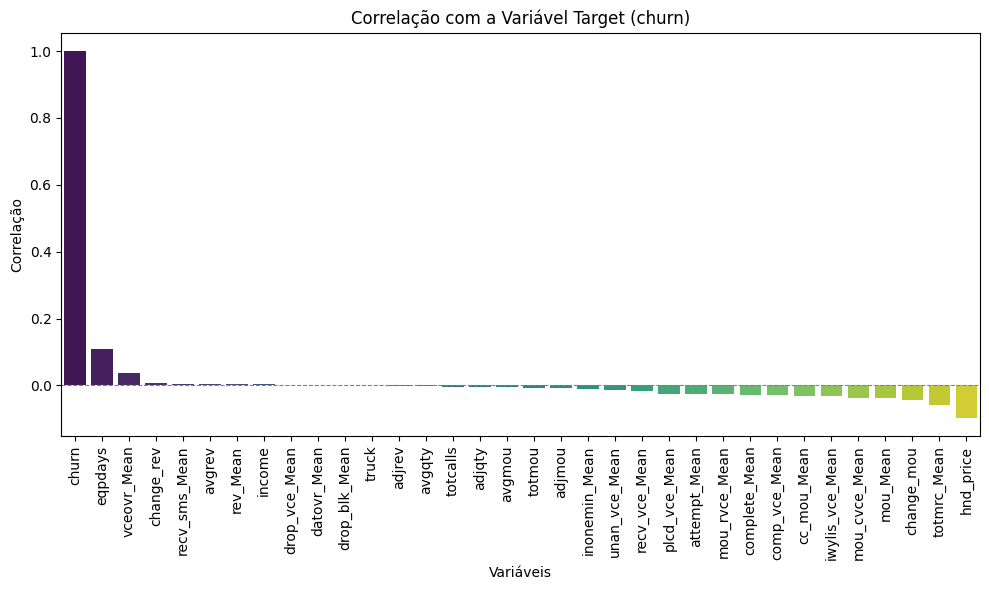

In [ ]:
# Fazendo a correlação com a variável target
numeric_df_reduced = df_reduced.select_dtypes(include=[float, int, bool])

correlation_matrix = numeric_df_reduced.corr()

# Extraindo a correlação com a variável alvo 'churn'
churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)

pd.set_option('display.max_rows', None)
print(churn_correlation)
plt.figure(figsize=(10, 6))
sns.barplot(x=churn_correlation.index, y=churn_correlation.values, palette='viridis')
plt.title('Correlação com a Variável Target (churn)')
plt.xlabel('Variáveis')
plt.ylabel('Correlação')
plt.xticks(rotation=90)
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

In [ ]:
# Colunas neutras à correlação
colunas_para_remover = ['change_rev', 'recv_sms_Mean', 'avgrev', 'drop_vce_Mean', 'rev_Mean',
    'drop_blk_Mean', 'income', 'datovr_Mean', 'avgqty', 'truck',
    'adjrev']

# Removendo as colunas
df_reduced = df_reduced.drop(columns=colunas_para_remover)

# Verificando o DataFrame resultante
print(df_reduced.info())


<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 75721 to 91054
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mou_Mean         45502 non-null  float64
 1   totmrc_Mean      45502 non-null  float64
 2   vceovr_Mean      45502 non-null  float64
 3   change_mou       45502 non-null  float64
 4   unan_vce_Mean    45502 non-null  float64
 5   plcd_vce_Mean    45502 non-null  float64
 6   recv_vce_Mean    45502 non-null  float64
 7   comp_vce_Mean    45502 non-null  float64
 8   cc_mou_Mean      45502 non-null  float64
 9   inonemin_Mean    45502 non-null  float64
 10  mou_cvce_Mean    45502 non-null  float64
 11  mou_rvce_Mean    45502 non-null  float64
 12  iwylis_vce_Mean  45502 non-null  float64
 13  attempt_Mean     45502 non-null  float64
 14  complete_Mean    45502 non-null  float64
 15  churn            45502 non-null  int64  
 16  new_cell         45502 non-null  object 
 17  asl_flag     

In [ ]:
df_reduced.shape


(45502, 31)

****
**<font color=pink size=3> ANÁLISE DE VARIÁVEIS CATEGÓRICAS EM RELAÇÃO AO ALVO (CHURN)</font>**

Transformação de variáveis categóricas em numéricas para fazer a correlação das variáveis com o nosso alvo (churn), identificar as que têm mais influência sobre ele e assim fazer a seleção das features.

In [ ]:
#Visão geral dos tipos de variáveis
print(df_reduced.head())
print(df_reduced.dtypes)

       mou_Mean  totmrc_Mean  vceovr_Mean  change_mou  unan_vce_Mean  \
75721    695.75      44.9900        8.575       18.25      24.333333   
19864     78.25      29.9900        0.000      -13.25      24.000000   
76699     30.00      44.9900        0.000      -30.00       4.000000   
92991    204.00       7.9975        1.700     -204.00      84.000000   
76434    120.00      79.9900        2.850      -23.00       9.666667   

       plcd_vce_Mean  recv_vce_Mean  comp_vce_Mean  cc_mou_Mean  \
75721     173.333333      57.000000     140.000000     0.000000   
19864      57.333333       7.000000      29.666667     0.540000   
76699       9.666667       1.333333       5.666667     0.000000   
92991     256.666667      26.333333     132.333333     0.183333   
76434      50.000000      17.333333      37.000000     0.000000   

       inonemin_Mean  ...  adjqty  avgmou                       area  \
75721      14.666667  ...    2002  636.90         SOUTH FLORIDA AREA   
19864       5.000000

In [ ]:
# Selecionando variáveis categóricas
categorical_columns = df_reduced.select_dtypes(include=['object', 'category']).columns

In [ ]:
#Aqui vamos exibir uma lista das variáveis categóricas
print("Variáveis Categóricas:")
print(categorical_columns)

Variáveis Categóricas:
Index(['new_cell', 'asl_flag', 'area', 'dualband', 'refurb_new', 'hnd_webcap',
       'marital', 'creditcd'],
      dtype='object')


In [ ]:
#Exibindo o conteúdo e a quantidade das variáveis categóricas.
for col in categorical_columns:
    print(f"\nColuna: {col}")
    print(df_reduced[col].value_counts())


Coluna: new_cell
new_cell
U    30652
Y     8742
N     6108
Name: count, dtype: int64

Coluna: asl_flag
asl_flag
N    40196
Y     5306
Name: count, dtype: int64

Coluna: area
area
NEW YORK CITY AREA               5086
MIDWEST AREA                     2973
DC/MARYLAND/VIRGINIA AREA        2919
LOS ANGELES AREA                 2912
ATLANTIC SOUTH AREA              2746
SOUTHWEST AREA                   2653
NEW ENGLAND AREA                 2548
CALIFORNIA NORTH AREA            2463
CHICAGO AREA                     2415
DALLAS AREA                      2403
GREAT LAKES AREA                 2256
OHIO AREA                        2235
HOUSTON AREA                     2048
NORTH FLORIDA AREA               2038
CENTRAL/SOUTH TEXAS AREA         1961
NORTHWEST/ROCKY MOUNTAIN AREA    1869
SOUTH FLORIDA AREA               1529
TENNESSEE AREA                   1255
PHILADELPHIA AREA                1193
Name: count, dtype: int64

Coluna: dualband
dualband
Y    34899
N     8452
T     2151
Name: count,

In [ ]:
df_reduced.shape

(45502, 31)

In [ ]:
# Excluindo variáveis algumas variáveis categóricas
features_to_drop = ['marital', 'area']
df_reduced = df_reduced.drop(columns=features_to_drop)

In [ ]:
df_reduced.shape

(45502, 29)

Vamos usar o One-Hot Encoding para transformar essas variáveis categóricas em numéricas.


In [ ]:

df_reduced_encoded = pd.get_dummies(df_reduced, columns=['new_cell', 'asl_flag', 'dualband',
                                         'refurb_new', 'hnd_webcap', 'creditcd'],
                            drop_first=True)

# Exibir as primeiras linhas para verificar o resultado
print(df_reduced_encoded.head())


       mou_Mean  totmrc_Mean  vceovr_Mean  change_mou  unan_vce_Mean  \
75721    695.75      44.9900        8.575       18.25      24.333333   
19864     78.25      29.9900        0.000      -13.25      24.000000   
76699     30.00      44.9900        0.000      -30.00       4.000000   
92991    204.00       7.9975        1.700     -204.00      84.000000   
76434    120.00      79.9900        2.850      -23.00       9.666667   

       plcd_vce_Mean  recv_vce_Mean  comp_vce_Mean  cc_mou_Mean  \
75721     173.333333      57.000000     140.000000     0.000000   
19864      57.333333       7.000000      29.666667     0.540000   
76699       9.666667       1.333333       5.666667     0.000000   
92991     256.666667      26.333333     132.333333     0.183333   
76434      50.000000      17.333333      37.000000     0.000000   

       inonemin_Mean  ...  hnd_price  eqpdays  new_cell_U  new_cell_Y  \
75721      14.666667  ...   29.98999    334.0       False       False   
19864       5.0000

In [ ]:
# Aplicar One-Hot Encoding e sobrescrever o DataFrame original
df_reduced = pd.get_dummies(df_reduced, columns=['new_cell', 'asl_flag', 'dualband',
                                  'refurb_new', 'hnd_webcap', 'creditcd'],
                     drop_first=True)

# Verificar as primeiras linhas do DataFrame atualizado
print(df_reduced.head())

       mou_Mean  totmrc_Mean  vceovr_Mean  change_mou  unan_vce_Mean  \
75721    695.75      44.9900        8.575       18.25      24.333333   
19864     78.25      29.9900        0.000      -13.25      24.000000   
76699     30.00      44.9900        0.000      -30.00       4.000000   
92991    204.00       7.9975        1.700     -204.00      84.000000   
76434    120.00      79.9900        2.850      -23.00       9.666667   

       plcd_vce_Mean  recv_vce_Mean  comp_vce_Mean  cc_mou_Mean  \
75721     173.333333      57.000000     140.000000     0.000000   
19864      57.333333       7.000000      29.666667     0.540000   
76699       9.666667       1.333333       5.666667     0.000000   
92991     256.666667      26.333333     132.333333     0.183333   
76434      50.000000      17.333333      37.000000     0.000000   

       inonemin_Mean  ...  hnd_price  eqpdays  new_cell_U  new_cell_Y  \
75721      14.666667  ...   29.98999    334.0       False       False   
19864       5.0000

In [ ]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45502 entries, 75721 to 91054
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mou_Mean         45502 non-null  float64
 1   totmrc_Mean      45502 non-null  float64
 2   vceovr_Mean      45502 non-null  float64
 3   change_mou       45502 non-null  float64
 4   unan_vce_Mean    45502 non-null  float64
 5   plcd_vce_Mean    45502 non-null  float64
 6   recv_vce_Mean    45502 non-null  float64
 7   comp_vce_Mean    45502 non-null  float64
 8   cc_mou_Mean      45502 non-null  float64
 9   inonemin_Mean    45502 non-null  float64
 10  mou_cvce_Mean    45502 non-null  float64
 11  mou_rvce_Mean    45502 non-null  float64
 12  iwylis_vce_Mean  45502 non-null  float64
 13  attempt_Mean     45502 non-null  float64
 14  complete_Mean    45502 non-null  float64
 15  churn            45502 non-null  int64  
 16  totcalls         45502 non-null  int64  
 17  totmou       

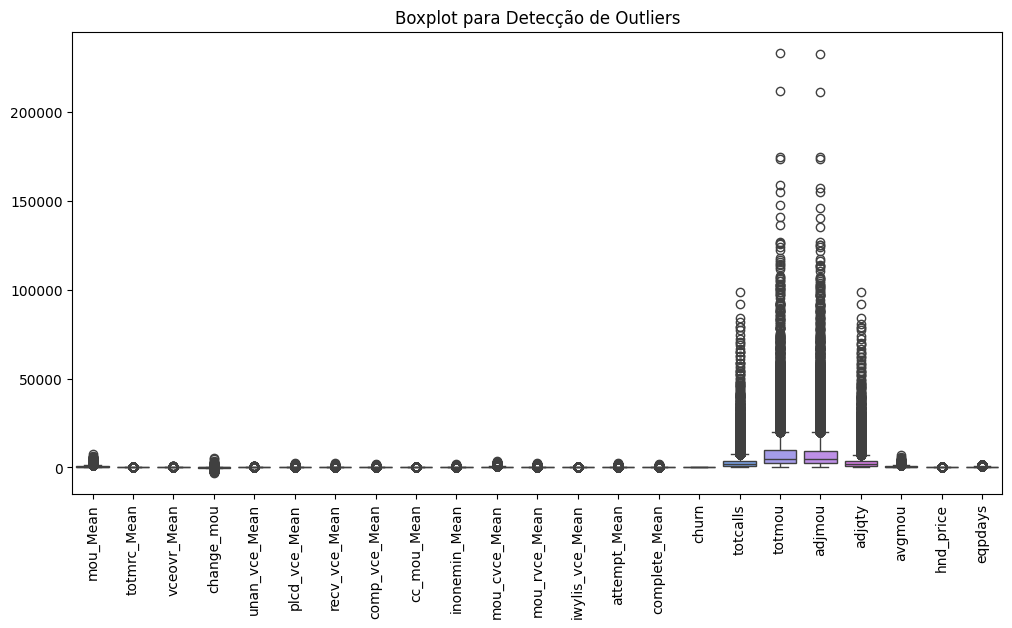

In [ ]:
#Dectando Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_reduced.select_dtypes(include=[float, int]))
plt.title('Boxplot para Detecção de Outliers')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Removendo outliers com base no IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns_to_check = ['adjmou', 'totmou']

for col in columns_to_check:
    df_reduced = remove_outliers_iqr(df_reduced, col)

print(f"Tamanho do dataset após remoção de outliers: {df_reduced.shape}")


Tamanho do dataset após remoção de outliers: (41524, 31)


In [ ]:
df_reduced.shape

(41524, 31)

**<font color=pink size=3> EXPLORANDO A VARIÁVEL CHURN</font>**

churn
0    21638
1    19886
Name: count, dtype: int64


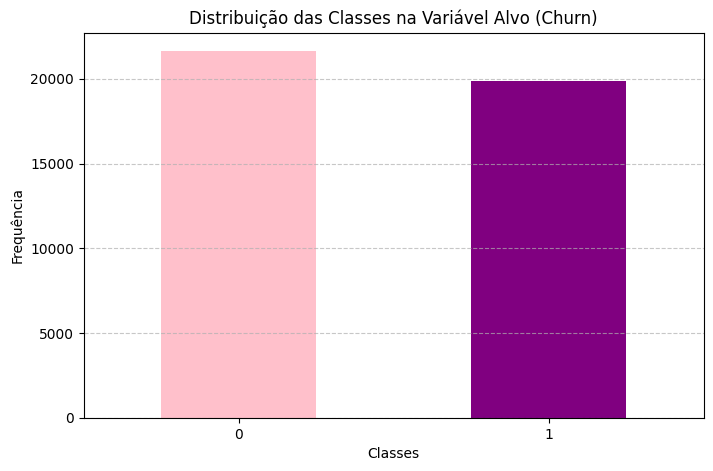

In [ ]:
class_distribution = df_reduced['churn'].value_counts()
print(class_distribution)

plt.figure(figsize=(8, 5))
class_distribution.plot(kind='bar', color=['pink', 'purple'])
plt.title('Distribuição das Classes na Variável Alvo (Churn)')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
df_reduced.shape

(41524, 31)

**<font color=pink size=3> DEFININDO OS VETORES DE CARACTERÍSTICAS E A VARIÁVEL TARGET</font>**

In [ ]:
X = df_reduced.drop(['churn'], axis=1)

y = df_reduced['churn']

**<font color=pink size=3> SEPARANDO O DATASET EM DADOS DE TREINO E DE TESTE</font>**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [ ]:
print("Distribuição original das classes:", Counter(y_train))

Distribuição original das classes: Counter({0: 17310, 1: 15909})


**<font color=pink size=3> BALANCEAMENTO</font>**

In [ ]:
#SMOTE para balanceamento
from sklearn.impute import SimpleImputer
# Verifique se há NaN
print("Quantidade de valores ausentes em cada coluna:")
print(X_train.isnull().sum())

# Preencher NaNs com a média (ou outra estratégia)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_imputed, y_train)

print("Distribuição após SMOTE:", Counter(y_train_balanced))



Quantidade de valores ausentes em cada coluna:
mou_Mean           0
totmrc_Mean        0
vceovr_Mean        0
change_mou         0
unan_vce_Mean      0
plcd_vce_Mean      0
recv_vce_Mean      0
comp_vce_Mean      0
cc_mou_Mean        0
inonemin_Mean      0
mou_cvce_Mean      0
mou_rvce_Mean      0
iwylis_vce_Mean    0
attempt_Mean       0
complete_Mean      0
totcalls           0
totmou             0
adjmou             0
adjqty             0
avgmou             0
hnd_price          0
eqpdays            0
new_cell_U         0
new_cell_Y         0
asl_flag_Y         0
dualband_T         0
dualband_Y         0
refurb_new_R       0
hnd_webcap_WCMB    0
creditcd_Y         0
dtype: int64
Distribuição após SMOTE: Counter({1: 17310, 0: 17310})


In [ ]:

X_train.shape, X_test.shape

((33219, 30), (8305, 30))

In [ ]:
X_train.dtypes

,0
mou_Mean,float64
totmrc_Mean,float64
vceovr_Mean,float64
change_mou,float64
unan_vce_Mean,float64
plcd_vce_Mean,float64
recv_vce_Mean,float64
comp_vce_Mean,float64
cc_mou_Mean,float64
inonemin_Mean,float64


In [ ]:
X_train.head()

,mou_Mean,totmrc_Mean,vceovr_Mean,change_mou,unan_vce_Mean,plcd_vce_Mean,recv_vce_Mean,comp_vce_Mean,cc_mou_Mean,inonemin_Mean,...,hnd_price,eqpdays,new_cell_U,new_cell_Y,asl_flag_Y,dualband_T,dualband_Y,refurb_new_R,hnd_webcap_WCMB,creditcd_Y
29743,135.75,30.000,0.00,-44.75,3.333333,41.333333,1.333333,30.333333,1.710000,0.333333,...,79.98999,636.0,True,False,False,False,True,False,True,True
43670,245.25,40.785,0.00,-131.25,414.000000,497.666667,22.666667,75.333333,4.863333,14.666667,...,129.98999,451.0,True,False,True,False,True,False,True,True
60312,254.75,39.990,0.00,142.25,16.333333,100.333333,38.666667,80.000000,37.016667,19.333333,...,149.98999,319.0,True,False,False,False,True,False,True,True
30128,84.75,30.000,0.00,-34.75,3.000000,34.333333,3.333333,27.666667,0.000000,1.333333,...,99.98999,309.0,True,False,False,True,False,False,True,True
41567,430.25,32.490,10.29,-186.25,51.333333,261.333333,69.333333,194.333333,3.423333,46.666667,...,149.98999,533.0,True,False,False,False,True,False,True,True


In [ ]:
df_reduced.shape

(41524, 31)

### **04. Implementação da técnica de IA selecionada.**

In [ ]:
# Treinando o modelo
dt_model = DecisionTreeClassifier(random_state=42)

# Definindo a busca expandida de hiperparâmetros
param_distributions = {
    'max_depth': [3],
    'min_samples_split': [2, 5, 10, 15, 20, 30],
    'min_samples_leaf': [1, 2, 5, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt_model,
                                   param_distributions=param_distributions,
                                   n_iter=150,
                                   scoring='accuracy',
                                   cv=4,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

# Ajustando o modelo
random_search.fit(X_train_balanced, y_train_balanced)

# Melhor modelo
best_dt_model = random_search.best_estimator_
print("Melhores Hiperparâmetros:", random_search.best_params_)

Fitting 4 folds for each of 150 candidates, totalling 600 fits
Melhores Hiperparâmetros: {'splitter': 'best', 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 3, 'criterion': 'gini'}


### **05. Avaliação dos resultados da técnica de IA implementada.**

Acurácia média em 5 folds: 0.5881
Desvio padrão da acurácia: 0.0067
Acurácia no conjunto de treino: 0.5915
Acurácia no conjunto de teste: 0.5648

Relatório de Classificação com Atributos Reduzidos:
              precision    recall  f1-score   support

           0       0.60      0.48      0.53      4328
           1       0.54      0.66      0.59      3977

    accuracy                           0.56      8305
   macro avg       0.57      0.57      0.56      8305
weighted avg       0.57      0.56      0.56      8305



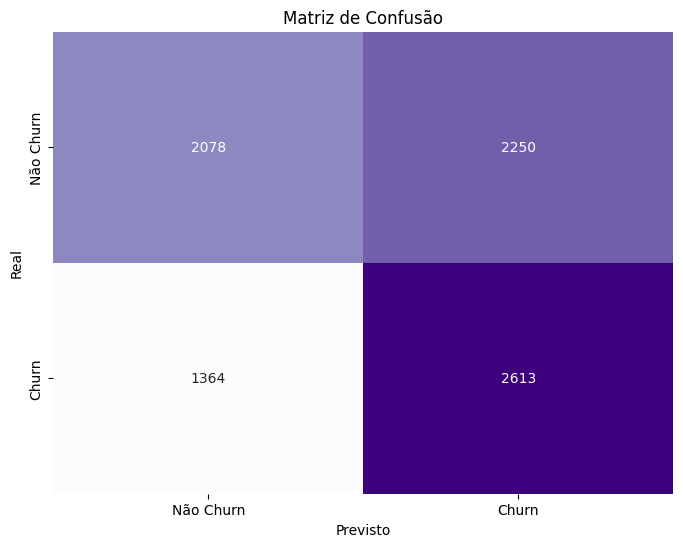

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<eqpdays &le; 304.071<br/>gini = 0.5<br/>samples = 34620<br/>value = [17310, 17310]<br/>class = Não Churn>, fillcolor="#ffffff"] ;
1 [label=<refurb_new_R &le; 0.001<br/>gini = 0.476<br/>samples = 13775<br/>value = [8404, 5371]<br/>class = Não Churn>, fillcolor="#f6d2b8"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<vceovr_Mean &le; 0.181<br/>gini = 0.459<br/>samples = 10919<br/>value = [7021, 3898]<br/>class = Não Churn>, fillcolor="#f3c7a7"] ;
1 -> 2 ;
3 [label=<gini = 0.42<br/>samples = 4901<br/>value = [3430.0, 1471.0]<br/>class = Não Churn>, fillcolor="#f0b78e"] ;
2 -> 3 ;
4 [label=<gini = 0.481<br/>samples = 6018<br/>value = [3591, 2427]<br/>class = Não Churn>, fillcolor="#f7d6bf"] ;
2 -> 4 ;
5 [label=<refurb_new_R &le; 0.999<br/>gini = 0.5<br/>samples = 2856<br/>value = [1383.0, 1473.0]<br/>class = Churn>, fillcolor="#

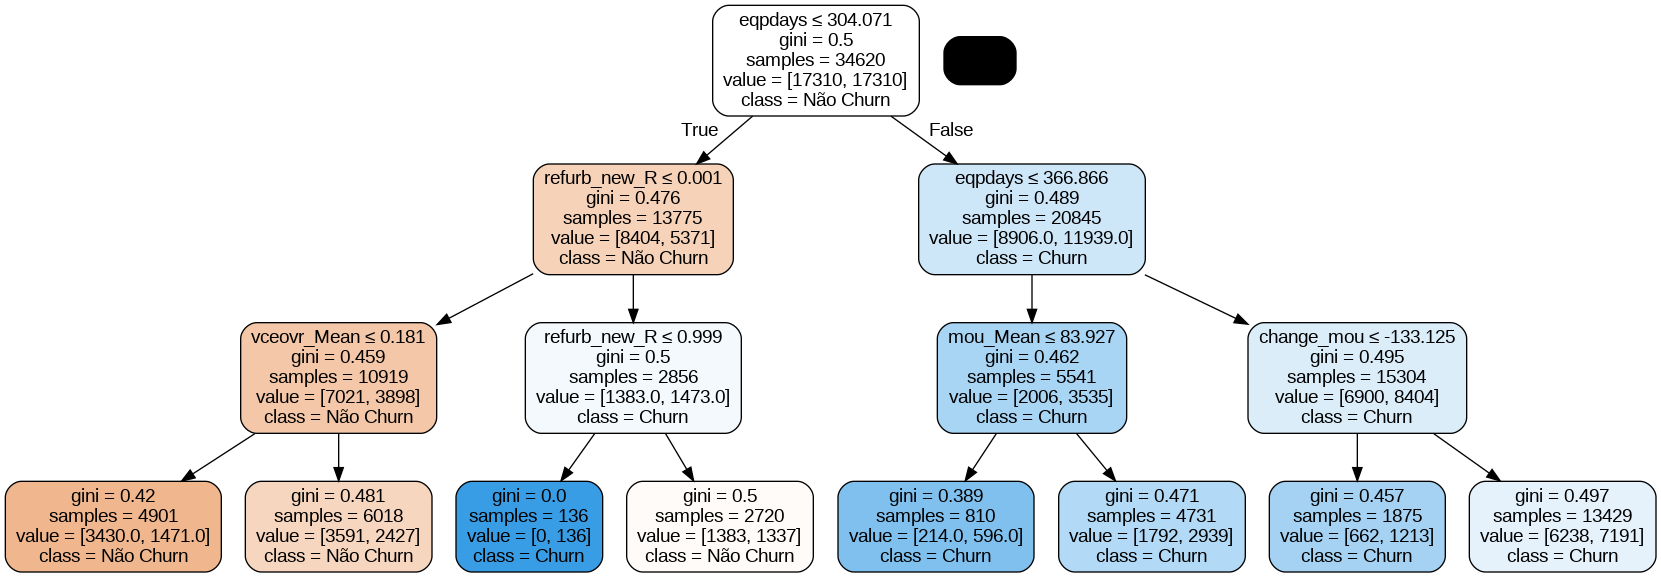

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import pydotplus
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

# Validação cruzada
cv_scores = cross_val_score(best_dt_model, X_train_balanced, y_train_balanced, cv=5)

# Avaliar resultados da validação cruzada
print("Acurácia média em 5 folds: {:.4f}".format(np.mean(cv_scores)))
print("Desvio padrão da acurácia: {:.4f}".format(np.std(cv_scores)))

# Avaliando o modelo no conjunto de treino e teste
train_accuracy = best_dt_model.score(X_train_balanced, y_train_balanced)
test_accuracy = best_dt_model.score(X_test, y_test)

# Exibir as acurácias
print(f'Acurácia no conjunto de treino: {train_accuracy:.4f}')
print(f'Acurácia no conjunto de teste: {test_accuracy:.4f}')

# Fazendo a predição no conjunto de teste
y_pred_reduced = best_dt_model.predict(X_test)

print("\nRelatório de Classificação com Atributos Reduzidos:")
print(classification_report(y_test, y_pred_reduced))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_reduced)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Purples", cbar=False,
            xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

# Visualização da Árvore de Decisão
if hasattr(best_dt_model, 'tree_'):
    feature_names = [
        'mou_Mean',
        'totmrc_Mean',
        'vceovr_Mean',
        'change_mou',
        'unan_vce_Mean',
        'plcd_vce_Mean',
        'recv_vce_Mean',
        'comp_vce_Mean',
        'cc_mou_Mean',
        'inonemin_Mean',
        'mou_cvce_Mean',
        'mou_rvce_Mean',
        'iwylis_vce_Mean',
        'attempt_Mean',
        'complete_Mean',
        'totcalls',
        'totmou',
        'adjmou',
        'adjqty',
        'avgmou',
        'hnd_price',
        'eqpdays',
        'new_cell_U',
        'new_cell_Y',
        'asl_flag_Y',
        'dualband_T',
        'dualband_Y',
        'refurb_new_R',
        'hnd_webcap_WCMB',
        'creditcd_Y'
    ]

    dot_data = export_graphviz(
        best_dt_model,
        out_file=None,
        feature_names=feature_names,
        class_names=['Não Churn', 'Churn'],
        filled=True,
        rounded=True,
        special_characters=True
    )

    print(dot_data)
    graph = pydotplus.graph_from_dot_data(dot_data)
    display(Image(graph.create_png()))



**<font color=pink size=3> GRAU DE IMPORTÂNCIA DOS ATRIBUTOS</font>**

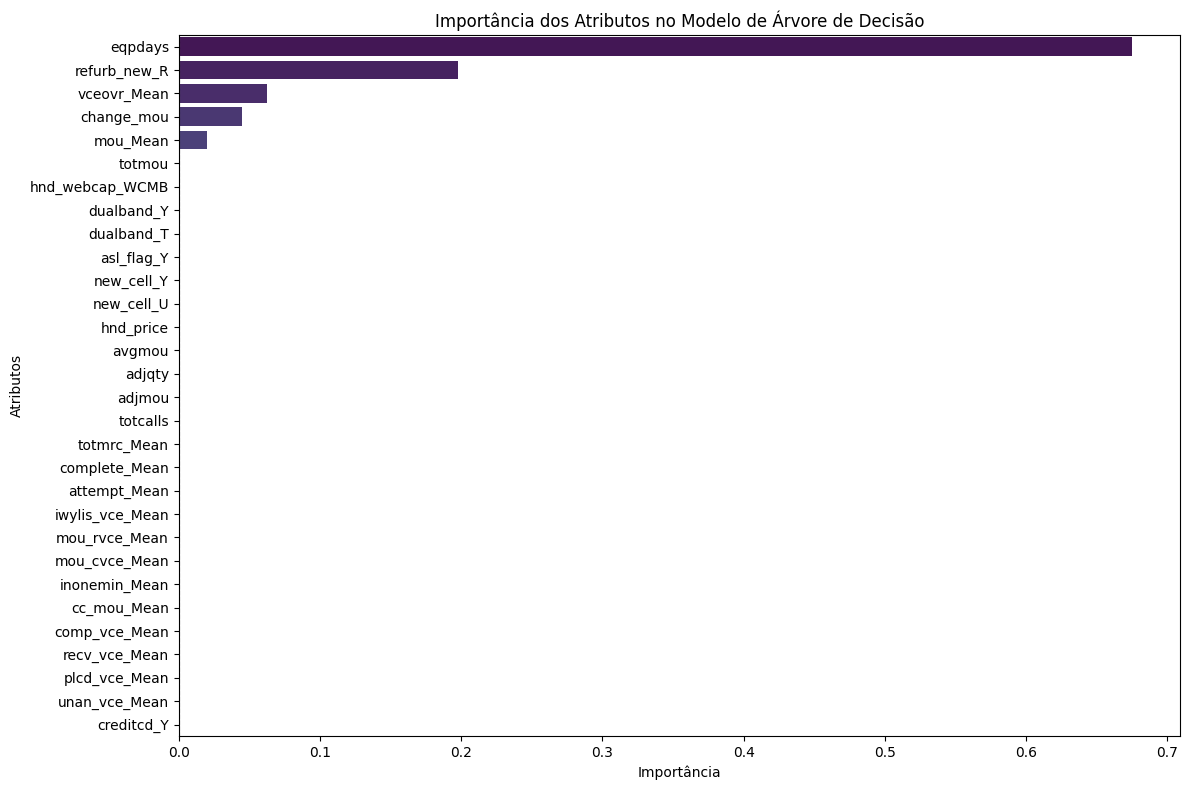

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extraindo a importância dos atributos
importances = best_dt_model.feature_importances_  # Use o melhor modelo que você treinou

# Nomes dos atributos
feature_names = [
    'mou_Mean', 'totmrc_Mean', 'vceovr_Mean', 'change_mou',
    'unan_vce_Mean', 'plcd_vce_Mean', 'recv_vce_Mean', 'comp_vce_Mean',
    'cc_mou_Mean', 'inonemin_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean',
    'iwylis_vce_Mean', 'attempt_Mean', 'complete_Mean', 'totcalls',
    'totmou', 'adjmou', 'adjqty', 'avgmou', 'hnd_price', 'eqpdays',
    'new_cell_U', 'new_cell_Y', 'asl_flag_Y', 'dualband_T',
    'dualband_Y', 'refurb_new_R', 'hnd_webcap_WCMB', 'creditcd_Y'
]

# Verificar se o número de importâncias e o número de nomes de atributos são iguais
if len(importances) != len(feature_names):
    print(f"Erro: O número de importâncias ({len(importances)}) não corresponde ao número de nomes de atributos ({len(feature_names)}).")
else:
    # Criando um DataFrame para facilitar a visualização
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Classificando as importâncias em ordem decrescente
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Visualizando a importância dos atributos
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Importância dos Atributos no Modelo de Árvore de Decisão')
    plt.xlabel('Importância')
    plt.ylabel('Atributos')
    plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')  # Linha de referência
    plt.tight_layout()
    plt.show()


### **06. Apresentação da solução para o problema.**

Em um dataset extenso como esse, tentei simplificá-lo bastante após diversos teste com os valores originais antes e após o pré-processamento. Também tentei o uso da Random Forest,e mesmo com ajuste de hiperparâmetros ainda demorava muito para concluir o treinamento. Então, de modo geral:

Esse modelo classifica corretamente 58.81% das amostras durante a validação cruzada.
Para a classe não churn obteve-se a precisão de 60%, indicando que 60% dos clientes previstos como Não Churn realmente não cancelaram.

E no Recall apenas 48% dos clientes que realmente não cancelaram foram corretamente identificados.

Para a classe de cancelamento (Onde 1 = Churn)
A precisão indica que 54% dos clientes previstos como Churn realmente cancelaram e no recall mostrou-se que 66% dos clientes que realmente cancelaram  foram adequadamente identificados.

Quanto ao problema de cancelamento ou não, a empresa pode focar nos clientes com mais dias de uso do equipamento(eqpdays), além dos que geram mais receita devido ao uso mensal elevado (vceovr_Mean, mou_Mean, change_Mean).

## <font color=green size=6>**Esclarecimentos e Requisitos do projeto**</font>

**>> Esclarecimentos**
1. Este arquivo é a base para a organização do seu trabalho final. Você pode trabalhar diretamente nele, pois ele foi criado para você.

2. Cuide de manter a Estrutura com os 6 itens acima.

3. Não obstante, dentro de cada item, pode criar mais caixas de código, conforme a sua necessidade.

4. Pode também inserir mais caixas de texto dentro de cada um desses 6 itens. Ao criar subtítulos, cuide para antecedê-los pelo símbolo '#####', de modo a controlar o tamanho do texto, para que fique menor que o tamanho dos 6 títulos.

5. É recomendável que você comente o seu código, usando o '#' dentro das caixas de código.

6. O seu trabalho precisa atender aos requisitos a seguir para que seja aprovado. Mas, lembre-se que você tem acesso às aulas e terá 02 supervisões presenciais para sanar as suas dúvidas.

**>> Requisitos Gerais**
1. Você deve preencher o seu nome, indicar a técnica de IA que usou e a fonte original do Banco de Dados.

2. Sempre que possível, você DEVE priorizar o uso do Pandas, do Matplotlib e do Scikit Learn.

3. O link para o Banco de Dados utilizado no código deve ser informado.

4. O código deve funcionar quando executado por outra pessoa, sem qualquer necessidade de ajuste.

5. O código deve conter a visualização do Dataframe por meio de recursos como `head()` desde a sua importação e conforme for modificado. Assim, o leitor do código poderá acompanhar com mais facilidade o que está sendo feito.

6. Remova linhas do Banco de dados que tenham dados ausentes.

7. Mostre o código para o processo de conversão de variáveis categóricas que estão como 'nomes' para 'números'.

8. Mostre o código para o processo de seleção dos atributos que serão usados no treino. Cuide para evitar o problema de multicolinearidade.

**>> Requisitos para quem optar pelas técnicas de Árvore de Decisão para problemas de Classificação**
9. Apresente, pelo menos, 1 visualização da sua árvore de decisão. Se tiver criado uma floresta aleatória, selecione uma das árvores para exibí-la.

10. Apresente, pelo menos, 1 visualização da matriz de confusão.

11. Mostre o código para o processo de divisão de features/atributos e target/label/alvo.

12. Mostre o código para o processo de divisão dos dados em treino e teste.

13. Escolha uma técnica de pesquisa pelos melhores hiperparâmetros. Sugestão: RandomSearch.

14. Mostre o código para o processo de treinamento e avaliação do modelo, garantindo, no mínimo, as seguintes métricas: Acurácia, Precisão e Recall.

15. Apresente, pelo menos, 1 visualização relativa ao grau de importância dos atributos na versão final do seu modelo.

**>> Requisitos para quem optar pelas técnicas de Árvore de Decisão para problemas de Regressão**
9. Apresente, pelo menos, 1 visualização da sua árvore de decisão. Se tiver criado uma floresta aleatória, selecione uma das árvores para exibí-la.

10. Mostre o código para o processo de divisão de features/atributos e target/label/alvo.

11. Mostre o código para o processo de divisão dos dados em treino e teste.

12. Escolha uma técnica de pesquisa pelos melhores hiperparâmetros. Sugestão: RandomSearch.

13. Mostre o código para o processo de treinamento e avaliação do modelo, garantindo, no mínimo, as seguintes métricas: R2, MAE e MSE.

14. Apresente, pelo menos, 1 visualização relativa ao grau de importância dos atributos na versão final do seu modelo.

15. Apresente, pelo menos, 1 visualização adicional do seu modelo, além daquelas já realizadas.

**>> Requisitos para quem optar pela técnica de K-means**
9. Apresente, pelo menos, 1 visualização da distribuição dos dados originais.

10. Apresente, pelo menos, 1 visualização dos agrupamentos encontrados.

11. Mostre o código para o processo de criação dos dados que serão usados para execução do algoritmo e avaliação de sua adequação.

12. Mostre o código para o processo de escolha do número de clusters (valor de K).

13. Mostre o código para o processo de redução da dimensionalidade dos dados.

14. Mostre o código para o processo de ajuste do modelo aos dados e avaliação do modelo, garantindo, no mínimo, as seguintes métricas: Coeficiente de Silhueta.

15. Apresente, pelo menos, 1 visualização adicional além das solicitadas.